# Reward function

## Attempt 1

### Description
* Originally: an exponential function where y is between 0 - 100 and y = 100 at x = 21
* became a sort of gradual step function  
* between 0 and 100 percent of the total possible reward (y value)
* between 0 and 21 days (x value) and then you've maxed out the reward 
* May decide to create a secret higher amount if you reach a certain day threshold.


### method
* Created an exponential function where y reaches 100 at x = 21 and starts near 0. But then I thought, why not do something slightly different?
* converted it into a step function that provides flat rewards until next threshold (step) so that the user can feel a jump in reward for sticking with the habit
    * x = [0, 6] should have the same value of y,  [7, 14] should have the same value of y, [15, 20] should have the same value of y, and x = 21 should be 100
* Then, I thought to create a steady incline to the next step (to make it feel more like a gradual progression)


#### Base exp func where y = 100 at x = 21

* **y = a*e^(bx)** -> 100 = a\*e^(b\*21)
* for starting near 0: make x and y =1 -> 1=a*(e^1b) -> **a=e^b**
* 100 = [e^b]\*e^(21\*b) -> ln(100)=20b -> **b = 0.2302585** which means **a = 0.79433**
* exp function:  
y = 0.79433 ⋅ $e^{.2302585x}$

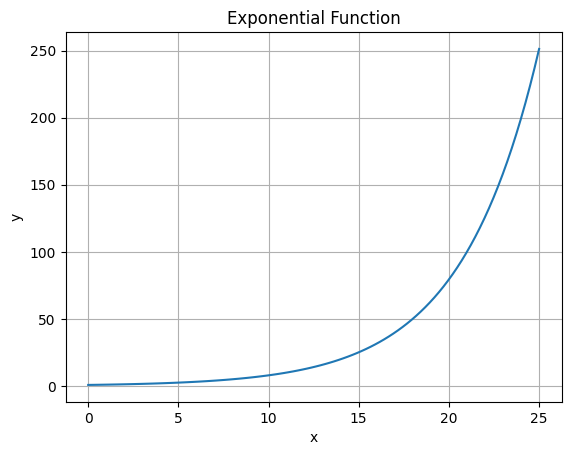

y at x = 21: 100.00020270625498


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_function(x):
    a = 0.79433
    b = 0.2302585
    return a * np.exp(b * x)

x = np.linspace(0, 25, 100)
y = exponential_function(x)

# Plot the function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Function')
plt.grid(True)
plt.show()

print("y at x = 21:", exponential_function(21))


#### converting to step function

* x = [0, 6] should have the same value of y,  [7, 14] should have the same value of y, [15, 20] should have the same value of y, and x = 21 should be 100
    * calc avg values of y from x = [0,6] , x = [7,14] , x = [15,20] , and y =100 at x = 21

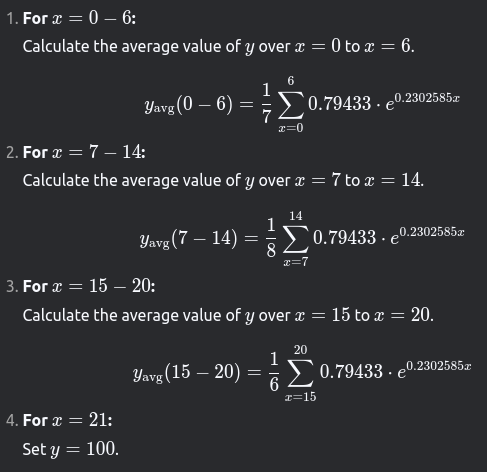

Step function:  
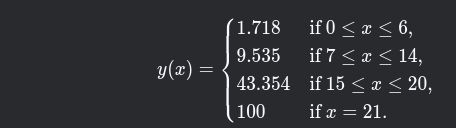

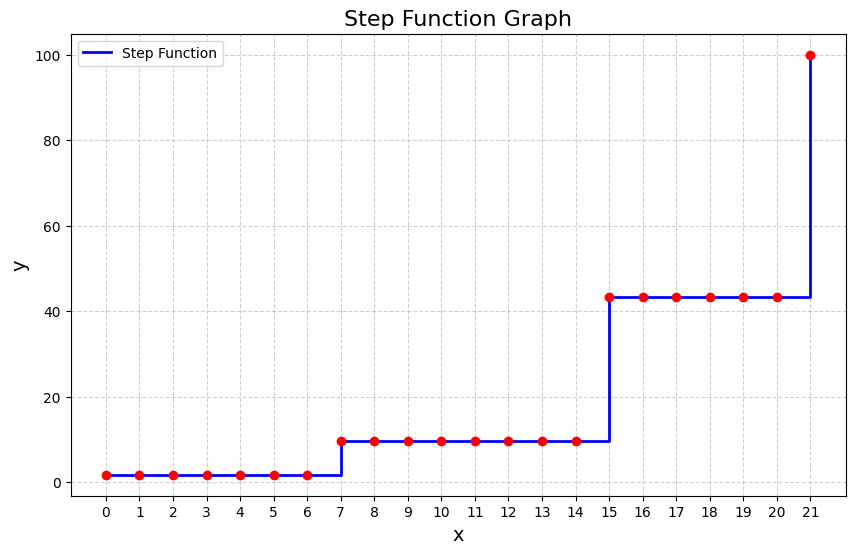

In [3]:
import matplotlib.pyplot as plt

# Define the step function
def step_function(x):
    if 0 <= x <= 6:
        return 1.718
    elif 7 <= x <= 14:
        return 9.535
    elif 15 <= x <= 20:
        return 43.354
    elif x == 21:
        return 100
    else:
        return None  # Undefined for other values of x

# Generate x and y values
x_values = list(range(0, 22))  # x ranges from 0 to 21
y_values = [step_function(x) for x in x_values]

# Plot the step function
plt.figure(figsize=(10, 6))
plt.step(x_values, y_values, where='post', color='blue', linewidth=2, label='Step Function')

# Add labels and title
plt.title('Step Function Graph', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xticks(x_values)  # Show all x values on the x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Highlight the step points
plt.scatter(x_values, y_values, color='red', zorder=5)  # Add red dots at the step points

# Show the plot
plt.show()

#### creating a steady incline between steps

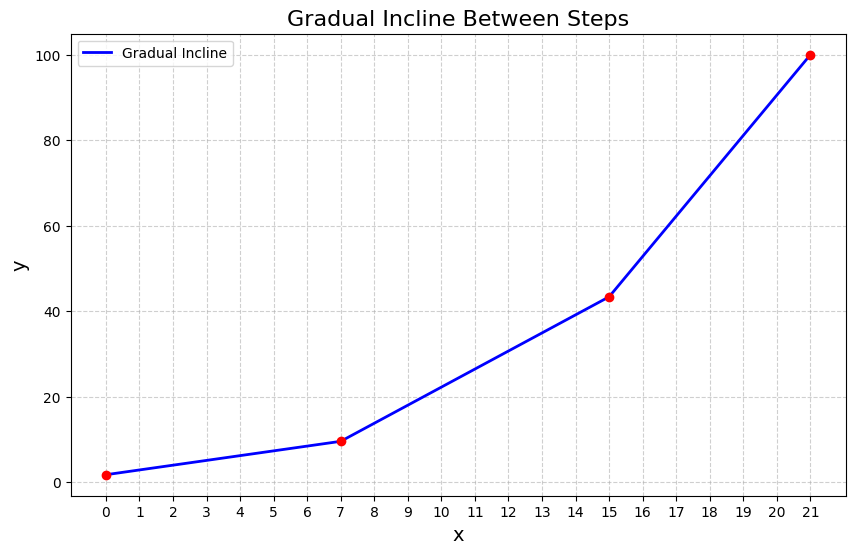

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the step function values
step_values = {
    0: 1.718,
    7: 9.535,
    15: 43.354,
    21: 100
}

# Create a list of x and y values for the step function
x_steps = list(step_values.keys())
y_steps = list(step_values.values())

# Generate x and y values for the gradual incline
x_values = np.arange(0, 22)  # x ranges from 0 to 21
y_values = np.interp(x_values, x_steps, y_steps)  # Linear interpolation

# Plot the gradual incline
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='blue', linewidth=2, label='Gradual Incline')

# Add labels and title
plt.title('Gradual Incline Between Steps', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xticks(x_values)  # Show all x values on the x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Highlight the step points
plt.scatter(x_steps, y_steps, color='red', zorder=5, label='Step Points')

# Show the plot
plt.show()

#### Composite graph:

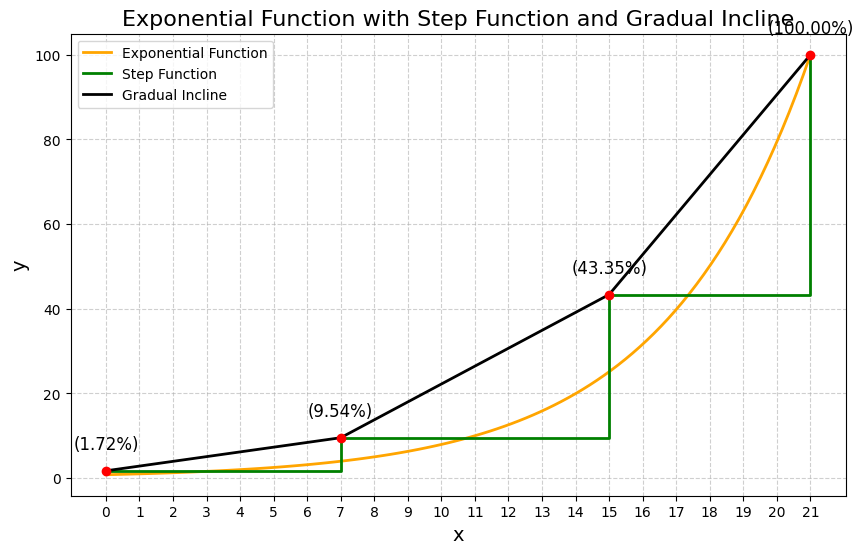

For x = 12, y = 30.67% reward

Slope between x = 0 and x = 7: 1.12
Slope between x = 7 and x = 15: 4.23
Slope between x = 15 and x = 21: 9.44


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the exponential function
def exponential_function(x):
    a = 0.79433
    b = 0.2302585
    return a * np.exp(b * x)

# Define the step function values
step_values = {
    0: 1.718,
    7: 9.535,
    15: 43.354,
    21: 100
}

# Create a list of x and y values for the step function
x_steps = list(step_values.keys())
y_steps = list(step_values.values())

# Generate x and y values for the gradual incline
x_values = np.arange(0, 22)  # x ranges from 0 to 21
y_values = np.interp(x_values, x_steps, y_steps)  # Linear interpolation

# Generate x and y values for the exponential function (stopping at x = 21)
x_exp = np.linspace(0, 21, 100)  # x ranges from 0 to 21
y_exp = exponential_function(x_exp)

# Plot the exponential function
plt.figure(figsize=(10, 6))
plt.plot(x_exp, y_exp, color='orange', linewidth=2, label='Exponential Function')

# Plot the step function
plt.step(x_steps, y_steps, where='post', color='green', linewidth=2, label='Step Function')

# Plot the gradual incline
plt.plot(x_values, y_values, color='black', linewidth=2, label='Gradual Incline')

# Add labels and title
plt.title('Exponential Function with Step Function and Gradual Incline', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xticks(np.arange(0, 22, 1))  # Show x values from 0 to 21
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Highlight the step points and label their y-values
for x, y in zip(x_steps, y_steps):
    plt.scatter(x, y, color='red', zorder=5)  # Plot red dots
    plt.text(x, y + 5, f'({y:.2f}%)', fontsize=12, ha='center')  # Add labels

# Show the plot
plt.show()

# Function to calculate y-value for the black-lined function (gradual incline)
def calculate_y(x_input):
    if x_input < 0 or x_input > 21:
        return "x must be between 0 and 21."
    return np.interp(x_input, x_values, y_values)


# Example usage of the function
x_input = 12

y_output = calculate_y(x_input)
print(f"For x = {x_input}, y = {y_output:.2f}% reward\n")

# Calculate and print the slope of each step area
for i in range(len(x_steps) - 1):
    x1, x2 = x_steps[i], x_steps[i + 1]
    y1, y2 = y_steps[i], y_steps[i + 1]
    slope = (y2 - y1) / (x2 - x1)  # Slope formula: (Δy / Δx)
    print(f"Slope between x = {x1} and x = {x2}: {slope:.2f}")